#### **Default for File Path**

In [23]:
import importlib.util
import os

# Define the path to config.py
config_path = os.path.abspath(os.path.join(os.path.dirname(r'C:\Users\nilay\OneDrive - Cal State Fullerton (1)\Desktop\NILAY-TO-JOB-DATA\SPRING 2024\CPSC 597 Project\Stock-Price-Prediction'), 'Stock-Price-Prediction', 'config.py'))

# Load the module from the specified path
spec = importlib.util.spec_from_file_location("config", config_path)
config = importlib.util.module_from_spec(spec)
spec.loader.exec_module(config)

### **Run Till Model Creation [Based on O, H, L, Date]**

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

data_file_path = os.path.join(config.BASE_DIR, 'dataset', 'INFY.NS.csv')
data=pd.read_csv(data_file_path, parse_dates=['Date'],index_col='Date')
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,0.794921,0.796679,0.791015,0.796679,0.549483,204800.0
1996-01-02,0.794921,0.798828,0.793457,0.793457,0.547260,204800.0
1996-01-03,0.798828,0.798828,0.798828,0.798828,0.550965,102400.0
1996-01-04,0.791015,0.794921,0.791015,0.793554,0.547327,307200.0
1996-01-05,0.784179,0.784179,0.784179,0.784179,0.540861,51200.0


In [26]:
# Step 2: Drop null values
data.dropna(inplace=True)

In [27]:
# Feature engineering: Extract date features
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Day'] = data.index.day
data['DayOfWeek'] = data.index.dayofweek

In [28]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,DayOfWeek
Date,,,,,,,,,,
1996-01-01,0.794921,0.796679,0.791015,0.796679,0.549483,204800.0,1996,1,1,0
1996-01-02,0.794921,0.798828,0.793457,0.793457,0.547260,204800.0,1996,1,2,1
1996-01-03,0.798828,0.798828,0.798828,0.798828,0.550965,102400.0,1996,1,3,2
1996-01-04,0.791015,0.794921,0.791015,0.793554,0.547327,307200.0,1996,1,4,3
1996-01-05,0.784179,0.784179,0.784179,0.784179,0.540861,51200.0,1996,1,5,4


In [29]:
# Prepare features and labels
features = data[['Open', 'High', 'Low', 'Year', 'Month', 'Day', 'DayOfWeek']]
labels = data['Close']

In [30]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
X_train_scaled[0]

array([ 0.85910752,  0.85183503,  0.86260717,  1.03797287, -0.1395767 ,
       -0.30849192, -1.41578437])

In [32]:
# Train a model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [33]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [34]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 16.165682730301427


In [35]:
# Example prediction
example_features = np.array([[0.784179, 0.784179, 0.784179, 1996, 1, 1, 1]])  # Example for 1996-01-05
example_features_scaled = scaler.transform(example_features)
example_prediction = model.predict(example_features_scaled)
print(f'Predicted Close Price: {example_prediction[0]}')

Predicted Close Price: 0.7885824999999999


c:\Users\nilay\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


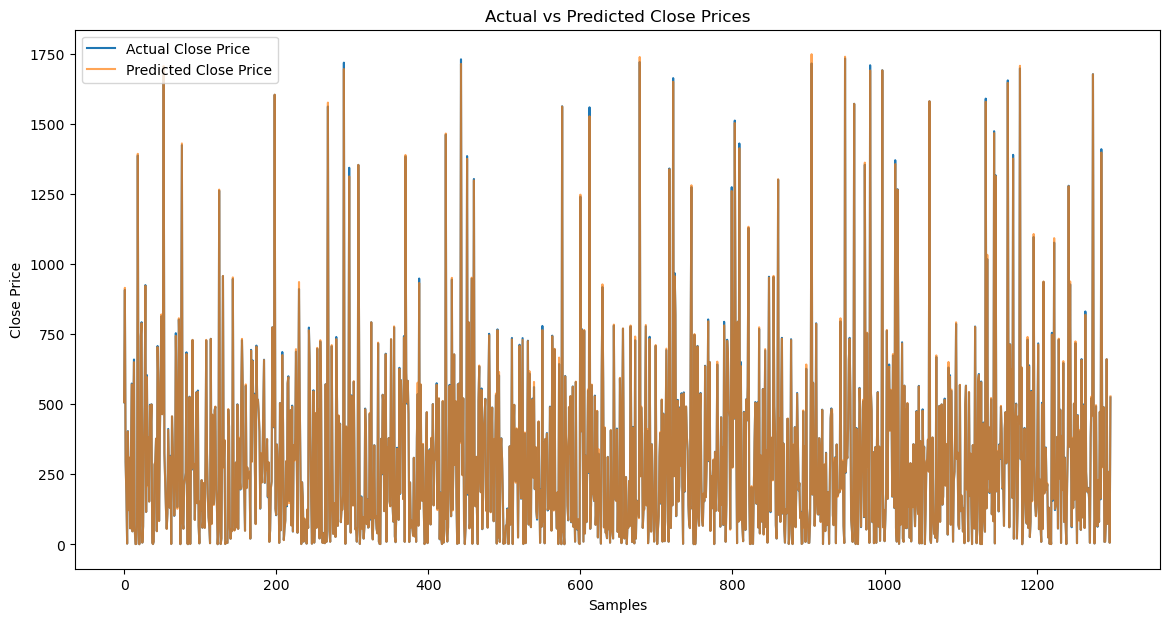

In [38]:
import matplotlib.pyplot as plt

# Plot the actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Close Price')
plt.plot(y_pred, label='Predicted Close Price', alpha=0.7)
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Samples')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [41]:
data_file_path = os.path.join(config.BASE_DIR, 'dataset', 'INFY.NS.csv')
orig_data=pd.read_csv(data_file_path, parse_dates=['Date'],index_col='Date')

In [42]:
# Step 2: Drop null values
orig_data.dropna(inplace=True)
# Feature engineering: Extract date features
orig_data['Year'] = orig_data.index.year
orig_data['Month'] = orig_data.index.month
orig_data['Day'] = orig_data.index.day
orig_data['DayOfWeek'] = orig_data.index.dayofweek

orig_data.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,DayOfWeek
Date,,,,,,,,,,
1996-01-01,0.794921,0.796679,0.791015,0.796679,0.549483,204800.0,1996,1,1,0
1996-01-02,0.794921,0.798828,0.793457,0.793457,0.547260,204800.0,1996,1,2,1
1996-01-03,0.798828,0.798828,0.798828,0.798828,0.550965,102400.0,1996,1,3,2
1996-01-04,0.791015,0.794921,0.791015,0.793554,0.547327,307200.0,1996,1,4,3
1996-01-05,0.784179,0.784179,0.784179,0.784179,0.540861,51200.0,1996,1,5,4


#### **Predicted for "1996-09-12"**

In [44]:
import pandas as pd
import numpy as np
from tabulate import tabulate

# Function to get features for a given date
def get_features_for_date(date_str, orig_data):
    date_row = orig_data.loc[date_str]
    features = np.array([
        [date_row['Open'], date_row['High'], date_row['Low'], 
         pd.to_datetime(date_str).year, pd.to_datetime(date_str).month, 
         pd.to_datetime(date_str).day, 1]
    ])
    return features

# Function to predict and format output for a given date
def predict_and_format(date_str, orig_data, scaler, model):
    features = get_features_for_date(date_str, orig_data)
    features_scaled = scaler.transform(features)
    predicted_close_price = model.predict(features_scaled)[0]

    # Displaying results in a table
    actual_value = orig_data.loc[date_str, 'Close']
    delta = predicted_close_price - actual_value
    delta_percent = (delta / actual_value) * 100

    return [date_str, predicted_close_price, actual_value, delta, f"{delta_percent:.2f}%"]

# Example usage
user_input_date = input("Enter a date in the format 'yyyy-mm-dd': ")

try:
    table_data = []

    # Predict for the next day, 7th day, and 14th day
    for offset in [1, 7, 14]:
        future_date = pd.to_datetime(user_input_date) + pd.DateOffset(days=offset)
        future_date_str = future_date.strftime('%Y-%m-%d')
        row_data = predict_and_format(future_date_str, orig_data, scaler, model)
        table_data.append(row_data)

    headers = ["Date", "Predicted Value", "Actual Value", "Delta", "Delta%"]

    print(tabulate(table_data, headers=headers, tablefmt="grid"))

except KeyError:
    print("Date not found in the data.")


c:\Users\nilay\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\nilay\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\nilay\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


+------------+-------------------+----------------+-------------+----------+
| Date       |   Predicted Value |   Actual Value |       Delta | Delta%   |
+============+===================+================+=============+==========+
| 1996-09-13 |           1.29097 |        1.28926 |  0.00171013 | 0.13%    |
+------------+-------------------+----------------+-------------+----------+
| 1996-09-19 |           1.30082 |        1.30859 | -0.00777791 | -0.59%   |
+------------+-------------------+----------------+-------------+----------+
| 1996-09-26 |           1.30029 |        1.29902 |  0.0012685  | 0.10%    |
+------------+-------------------+----------------+-------------+----------+


#### **Predicted for "2000-09-12"**

In [45]:
import pandas as pd
import numpy as np
from tabulate import tabulate

# Function to get features for a given date
def get_features_for_date(date_str, orig_data):
    date_row = orig_data.loc[date_str]
    features = np.array([
        [date_row['Open'], date_row['High'], date_row['Low'], 
         pd.to_datetime(date_str).year, pd.to_datetime(date_str).month, 
         pd.to_datetime(date_str).day, 1]
    ])
    return features

# Function to predict and format output for a given date
def predict_and_format(date_str, orig_data, scaler, model):
    features = get_features_for_date(date_str, orig_data)
    features_scaled = scaler.transform(features)
    predicted_close_price = model.predict(features_scaled)[0]

    # Displaying results in a table
    actual_value = orig_data.loc[date_str, 'Close']
    delta = predicted_close_price - actual_value
    delta_percent = (delta / actual_value) * 100

    return [date_str, predicted_close_price, actual_value, delta, f"{delta_percent:.2f}%"]

# Example usage
user_input_date = input("Enter a date in the format 'yyyy-mm-dd': ")

try:
    table_data = []

    # Predict for the next day, 7th day, and 14th day
    for offset in [1, 7, 14]:
        future_date = pd.to_datetime(user_input_date) + pd.DateOffset(days=offset)
        future_date_str = future_date.strftime('%Y-%m-%d')
        row_data = predict_and_format(future_date_str, orig_data, scaler, model)
        table_data.append(row_data)

    headers = ["Date", "Predicted Value", "Actual Value", "Delta", "Delta%"]

    print(tabulate(table_data, headers=headers, tablefmt="grid"))

except KeyError:
    print("Date not found in the data.")


+------------+-------------------+----------------+----------+----------+
| Date       |   Predicted Value |   Actual Value |    Delta | Delta%   |
+============+===================+================+==========+==========+
| 2000-09-13 |           136.886 |        136.189 | 0.697206 | 0.51%    |
+------------+-------------------+----------------+----------+----------+
| 2000-09-19 |           119.798 |        119.402 | 0.396007 | 0.33%    |
+------------+-------------------+----------------+----------+----------+
| 2000-09-26 |           113.702 |        113.247 | 0.455282 | 0.40%    |
+------------+-------------------+----------------+----------+----------+


c:\Users\nilay\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\nilay\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\nilay\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#### **Predicted for "2010-11-24"**

In [46]:
import pandas as pd
import numpy as np
from tabulate import tabulate

# Function to get features for a given date
def get_features_for_date(date_str, orig_data):
    date_row = orig_data.loc[date_str]
    features = np.array([
        [date_row['Open'], date_row['High'], date_row['Low'], 
         pd.to_datetime(date_str).year, pd.to_datetime(date_str).month, 
         pd.to_datetime(date_str).day, 1]
    ])
    return features

# Function to predict and format output for a given date
def predict_and_format(date_str, orig_data, scaler, model):
    features = get_features_for_date(date_str, orig_data)
    features_scaled = scaler.transform(features)
    predicted_close_price = model.predict(features_scaled)[0]

    # Displaying results in a table
    actual_value = orig_data.loc[date_str, 'Close']
    delta = predicted_close_price - actual_value
    delta_percent = (delta / actual_value) * 100

    return [date_str, predicted_close_price, actual_value, delta, f"{delta_percent:.2f}%"]

# Example usage
user_input_date = input("Enter a date in the format 'yyyy-mm-dd': ")

try:
    table_data = []

    # Predict for the next day, 7th day, and 14th day
    for offset in [1, 7, 14]:
        future_date = pd.to_datetime(user_input_date) + pd.DateOffset(days=offset)
        future_date_str = future_date.strftime('%Y-%m-%d')
        row_data = predict_and_format(future_date_str, orig_data, scaler, model)
        table_data.append(row_data)

    headers = ["Date", "Predicted Value", "Actual Value", "Delta", "Delta%"]

    print(tabulate(table_data, headers=headers, tablefmt="grid"))

except KeyError:
    print("Date not found in the data.")


+------------+-------------------+----------------+------------+----------+
| Date       |   Predicted Value |   Actual Value |      Delta | Delta%   |
+============+===================+================+============+==========+
| 2010-11-25 |           382.885 |        383.044 | -0.158819  | -0.04%   |
+------------+-------------------+----------------+------------+----------+
| 2010-12-01 |           381.601 |        381.55  |  0.0513213 | 0.01%    |
+------------+-------------------+----------------+------------+----------+
| 2010-12-08 |           391.827 |        391.394 |  0.433505  | 0.11%    |
+------------+-------------------+----------------+------------+----------+


c:\Users\nilay\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\nilay\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\nilay\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#### **Predicted for "2015-09-14"**

In [48]:
import pandas as pd
import numpy as np
from tabulate import tabulate

# Function to get features for a given date
def get_features_for_date(date_str, orig_data):
    date_row = orig_data.loc[date_str]
    features = np.array([
        [date_row['Open'], date_row['High'], date_row['Low'], 
         pd.to_datetime(date_str).year, pd.to_datetime(date_str).month, 
         pd.to_datetime(date_str).day, 1]
    ])
    return features

# Function to predict and format output for a given date
def predict_and_format(date_str, orig_data, scaler, model):
    features = get_features_for_date(date_str, orig_data)
    features_scaled = scaler.transform(features)
    predicted_close_price = model.predict(features_scaled)[0]

    # Displaying results in a table
    actual_value = orig_data.loc[date_str, 'Close']
    delta = predicted_close_price - actual_value
    delta_percent = (delta / actual_value) * 100

    return [date_str, predicted_close_price, actual_value, delta, f"{delta_percent:.2f}%"]

# Example usage
user_input_date = input("Enter a date in the format 'yyyy-mm-dd': ")

try:
    table_data = []

    # Predict for the next day, 7th day, and 14th day
    for offset in [1, 7, 14]:
        future_date = pd.to_datetime(user_input_date) + pd.DateOffset(days=offset)
        future_date_str = future_date.strftime('%Y-%m-%d')
        row_data = predict_and_format(future_date_str, orig_data, scaler, model)
        table_data.append(row_data)

    headers = ["Date", "Predicted Value", "Actual Value", "Delta", "Delta%"]

    print(tabulate(table_data, headers=headers, tablefmt="grid"))

except KeyError:
    print("Date not found in the data.")


+------------+-------------------+----------------+-----------+----------+
| Date       |   Predicted Value |   Actual Value |     Delta | Delta%   |
+============+===================+================+===========+==========+
| 2015-09-15 |           549.417 |        549.6   | -0.182868 | -0.03%   |
+------------+-------------------+----------------+-----------+----------+
| 2015-09-21 |           552.56  |        552.325 |  0.235241 | 0.04%    |
+------------+-------------------+----------------+-----------+----------+
| 2015-09-28 |           555.655 |        552.775 |  2.87986  | 0.52%    |
+------------+-------------------+----------------+-----------+----------+


c:\Users\nilay\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\nilay\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\nilay\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#### **Predicted Next Day Value**

In [84]:
features[-1].reshape(1, -1)

array([[1.296484e+00, 1.296679e+00, 1.296484e+00, 1.996000e+03,
        9.000000e+00, 1.200000e+01, 1.000000e+00]])

c:\Users\nilay\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\nilay\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\nilay\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predictions for the next day:
            Predictions
Date                   
2021-10-21  2365.809881

Predictions for the next 7 days:
             Predictions
Date                    
2021-10-21  2.365810e+03
2021-10-22  2.777963e+03
2021-10-23  6.487936e+05
2021-10-24  7.233471e+05
2021-10-25  2.715462e+05
2021-10-26  6.633346e+05
2021-10-27  1.376694e+06

Predictions for the next 14 days:
             Predictions
Date                    
2021-10-21  2.365810e+03
2021-10-22  2.777963e+03
2021-10-23  6.487936e+05
2021-10-24  7.233471e+05
2021-10-25  2.715462e+05
2021-10-26  6.633346e+05
2021-10-27  1.376694e+06
2021-10-28  1.946984e+06
2021-10-29  2.903475e+06
2021-10-30  3.283230e+06
2021-10-31  3.283230e+06
2021-11-01  3.283230e+06
2021-11-02  3.283230e+06
2021-11-03  3.283230e+06


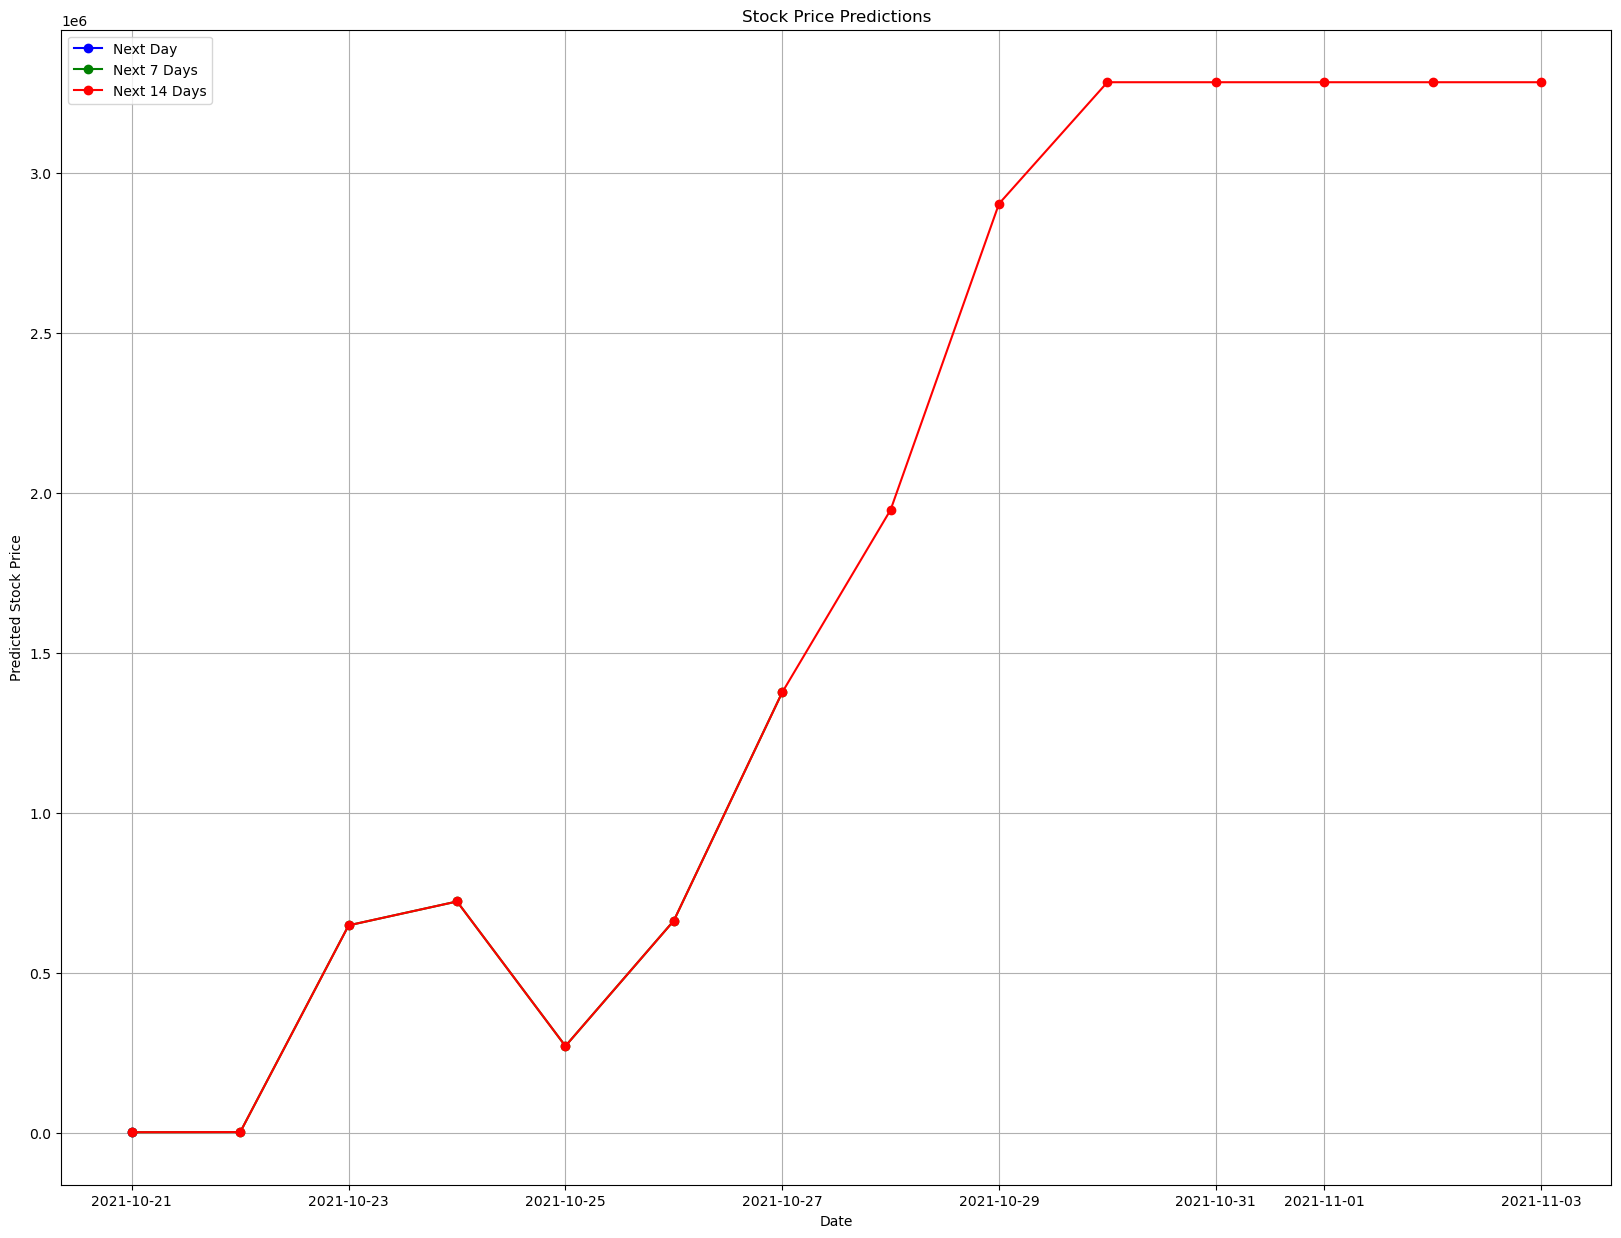

In [87]:
from datetime import datetime, timedelta

# Function to predict future stock prices
def predict_future_stock_prices(start_date_str, X_future):
    start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
    
    # Get the last available data point
    last_data_point = features[-1].reshape(1, -1)
    last_data_point_scaled = scaler.transform(last_data_point)
    
    predictions = []
    last = last_data_point_scaled.flatten()
    
    for _ in range(X_future):
        curr_prediction = model.predict(last.reshape(1, -1))
        last = np.concatenate([last[1:], curr_prediction])
        predictions.append(curr_prediction[0])
    
    predictions = np.array(predictions).reshape(-1, 1)
    # Since we only want to inverse transform the 'Close' prediction, we use the min and max of the 'Close' from training data for inverse transformation
    close_min = labels.min()
    close_max = labels.max()
    predictions = (predictions * (close_max - close_min)) + close_min
    
    dicts = []
    curr_date = start_date
    for i in range(X_future):
        curr_date = curr_date + timedelta(days=1)
        dicts.append({'Predictions': predictions[i][0], "Date": curr_date})
    
    new_data = pd.DataFrame(dicts).set_index("Date")
    return new_data

# User input
user_input_date = input("Enter a date in format 'yyyy-mm-dd': ")

# Predict the next day, next 7 days, and next 14 days
predictions_next_day = predict_future_stock_prices(user_input_date, 1)
predictions_next_7_days = predict_future_stock_prices(user_input_date, 7)
predictions_next_14_days = predict_future_stock_prices(user_input_date, 14)

# Display the predictions
print("Predictions for the next day:")
print(predictions_next_day)

print("\nPredictions for the next 7 days:")
print(predictions_next_7_days)

print("\nPredictions for the next 14 days:")
print(predictions_next_14_days)

# Plotting the predictions
plt.figure(figsize=(20, 15))

# Plot for next day
plt.plot(predictions_next_day.index, predictions_next_day['Predictions'], color='blue', marker='o', linestyle='-', label='Next Day')

# Plot for next 7 days
plt.plot(predictions_next_7_days.index, predictions_next_7_days['Predictions'], color='green', marker='o', linestyle='-', label='Next 7 Days')

# Plot for next 14 days
plt.plot(predictions_next_14_days.index, predictions_next_14_days['Predictions'], color='red', marker='o', linestyle='-', label='Next 14 Days')

plt.title('Stock Price Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Stock Price')
plt.legend()
plt.grid(True)
plt.show()